In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [35]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [2]:
data = pd.read_csv("blood_pressure_data.csv")

In [3]:
data.sample(3)

id        age  height(cm)  weight(kg)  relaxation  blood sugar  \
5221  80607.0        NaN       180.0        80.0        80.0         94.0   
3391      NaN  6/14/1974       155.0         NaN        88.0         86.0   
8768  11679.0  1/23/1999       175.0        70.0        67.0         91.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
5221        152.0          UNK   NaN   91.0         NaN            NaN   
3391          NaN         HiGH  52.0  126.0        13.2            1.0   
8768          NaN          LOW   NaN   97.0        15.4            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
5221               1.2  27.0   NaN  22.0            No           130.0  
3391               0.9   NaN  11.0  23.0            No             NaN  
8768               0.9  23.0   NaN  29.0            No           124.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7328 non-null   float64
 1   age               7312 non-null   object 
 2   height(cm)        7373 non-null   float64
 3   weight(kg)        7444 non-null   float64
 4   relaxation        7425 non-null   float64
 5   blood sugar       7438 non-null   float64
 6   Cholesterol       7386 non-null   float64
 7   triglyceride      8644 non-null   object 
 8   HDL               7391 non-null   float64
 9   LDL               7358 non-null   float64
 10  hemoglobin        7417 non-null   float64
 11  Urine protein     7475 non-null   float64
 12  serum creatinine  7433 non-null   float64
 13  AST               7427 non-null   float64
 14  ALT               7416 non-null   float64
 15  Gtp               7411 non-null   float64
 16  dental caries     10000 non-null  object 

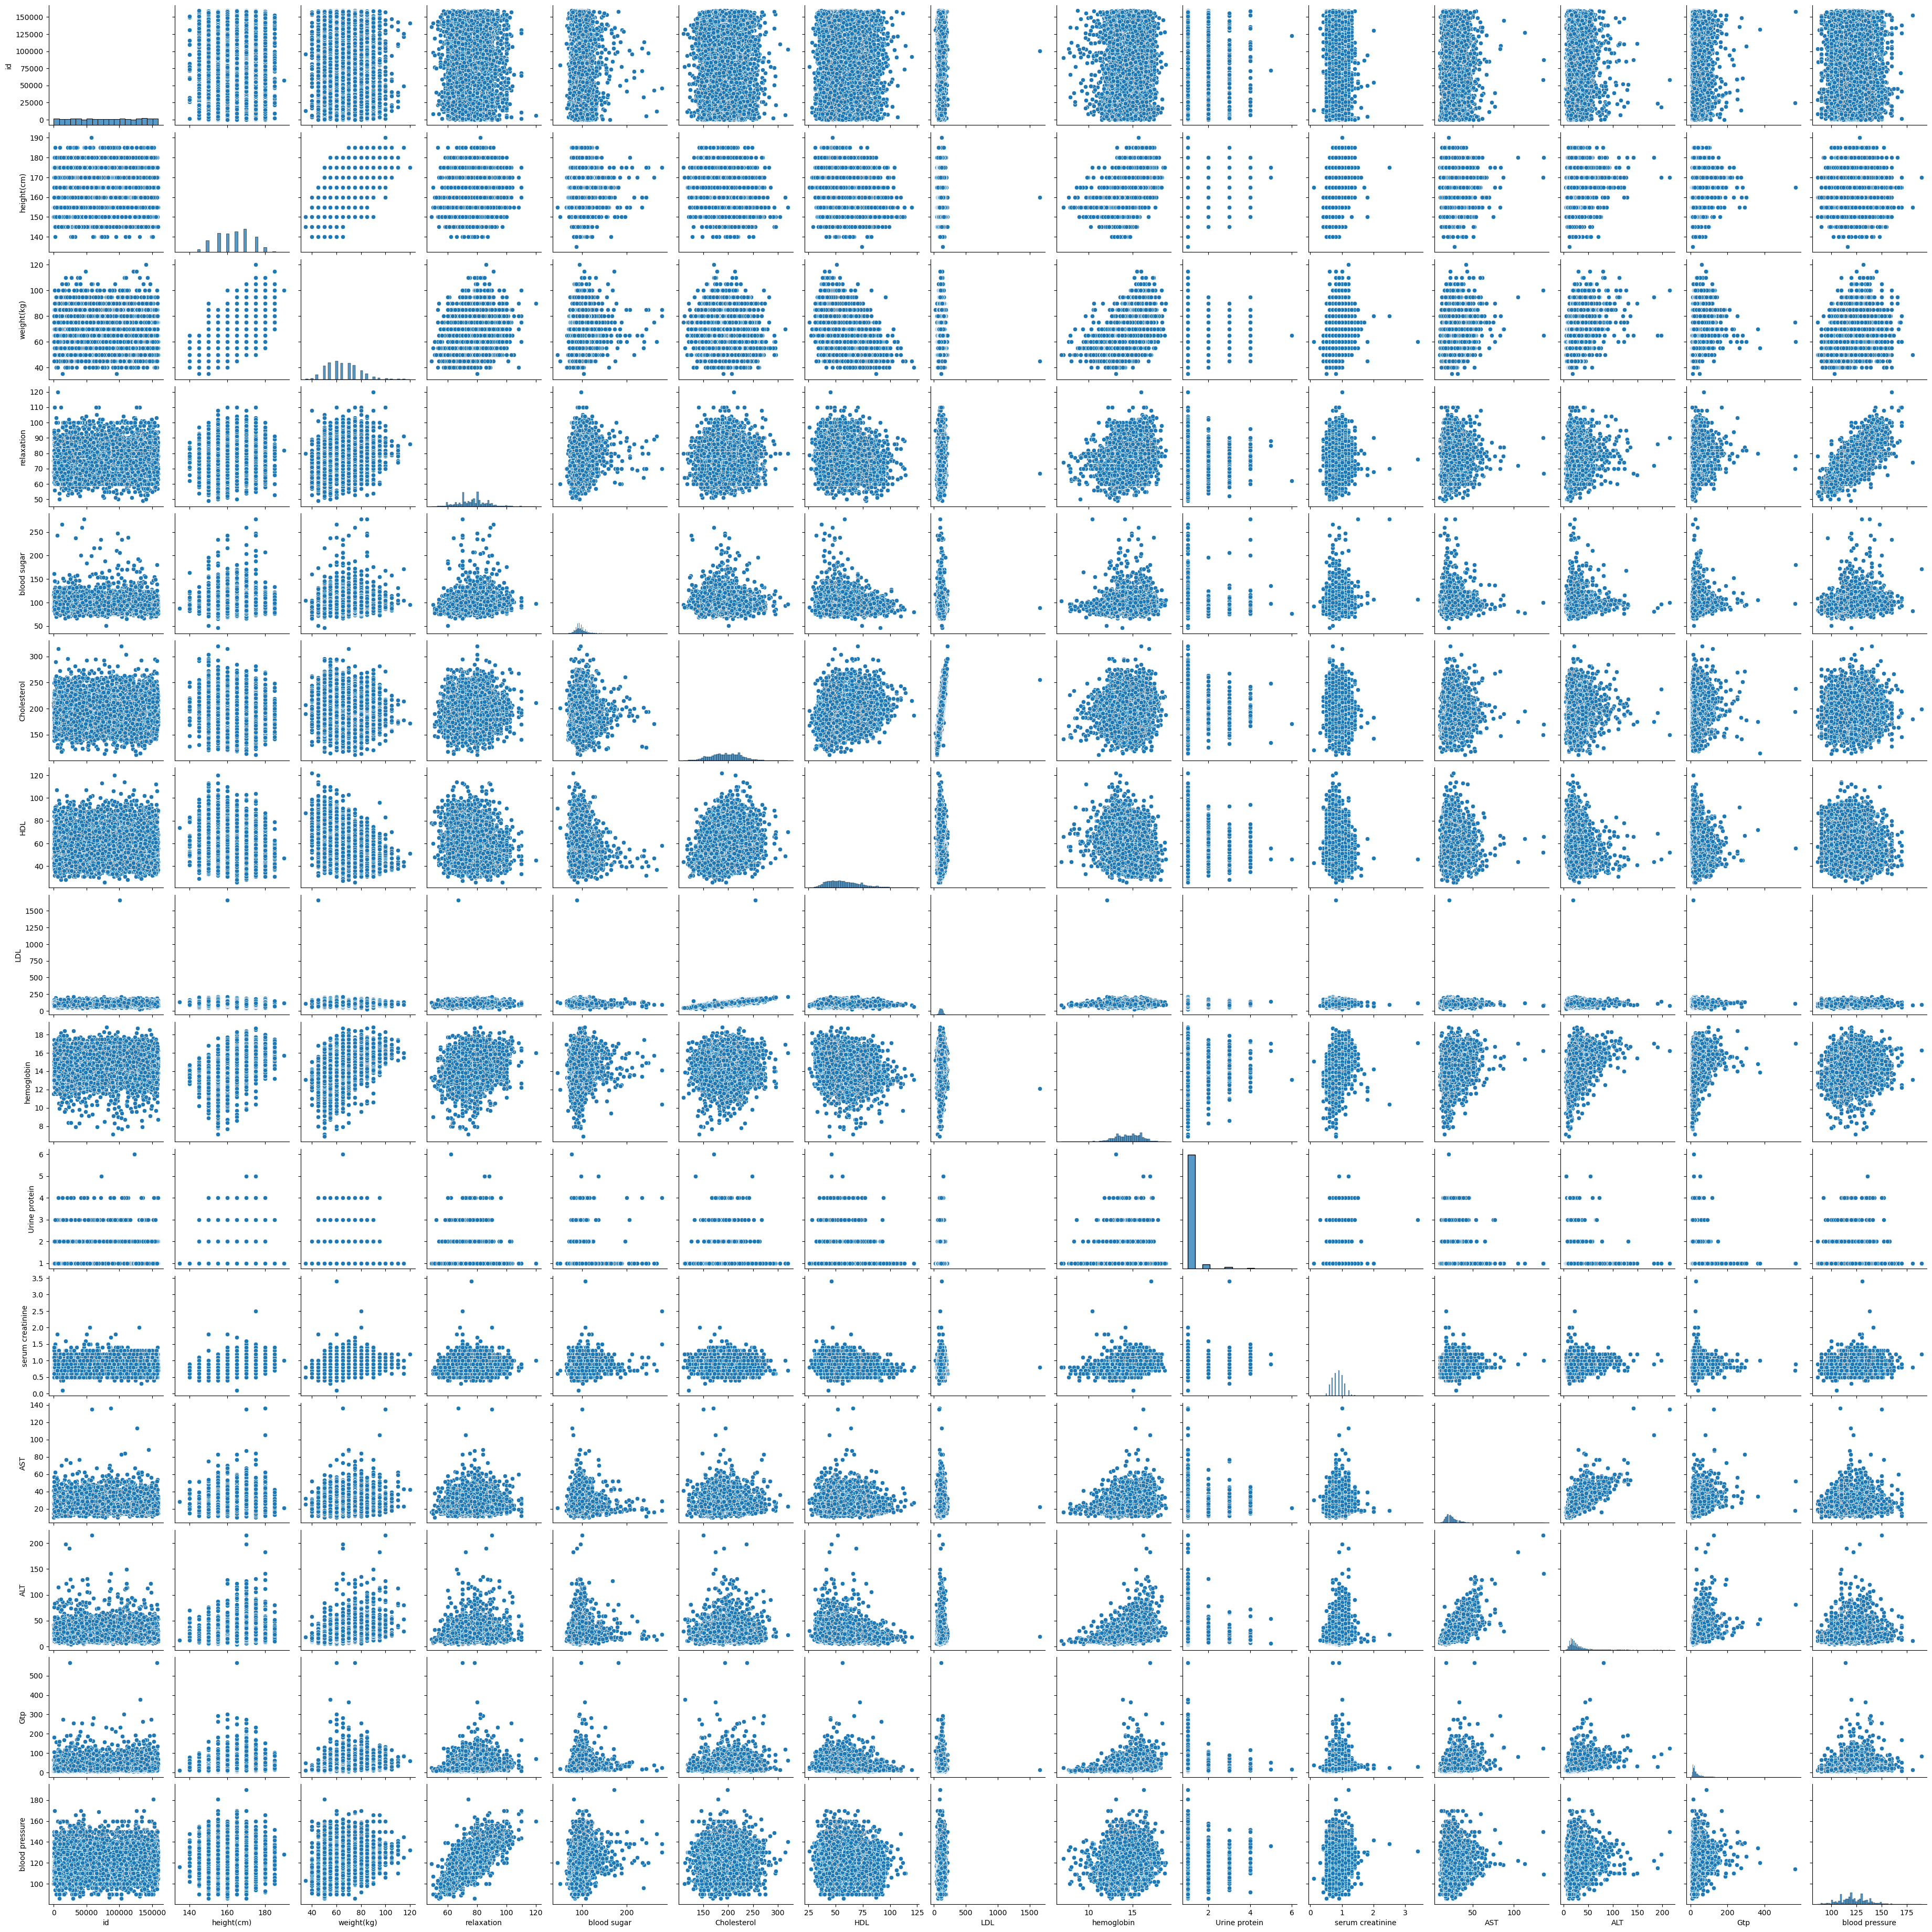

In [5]:
sns.pairplot(data)

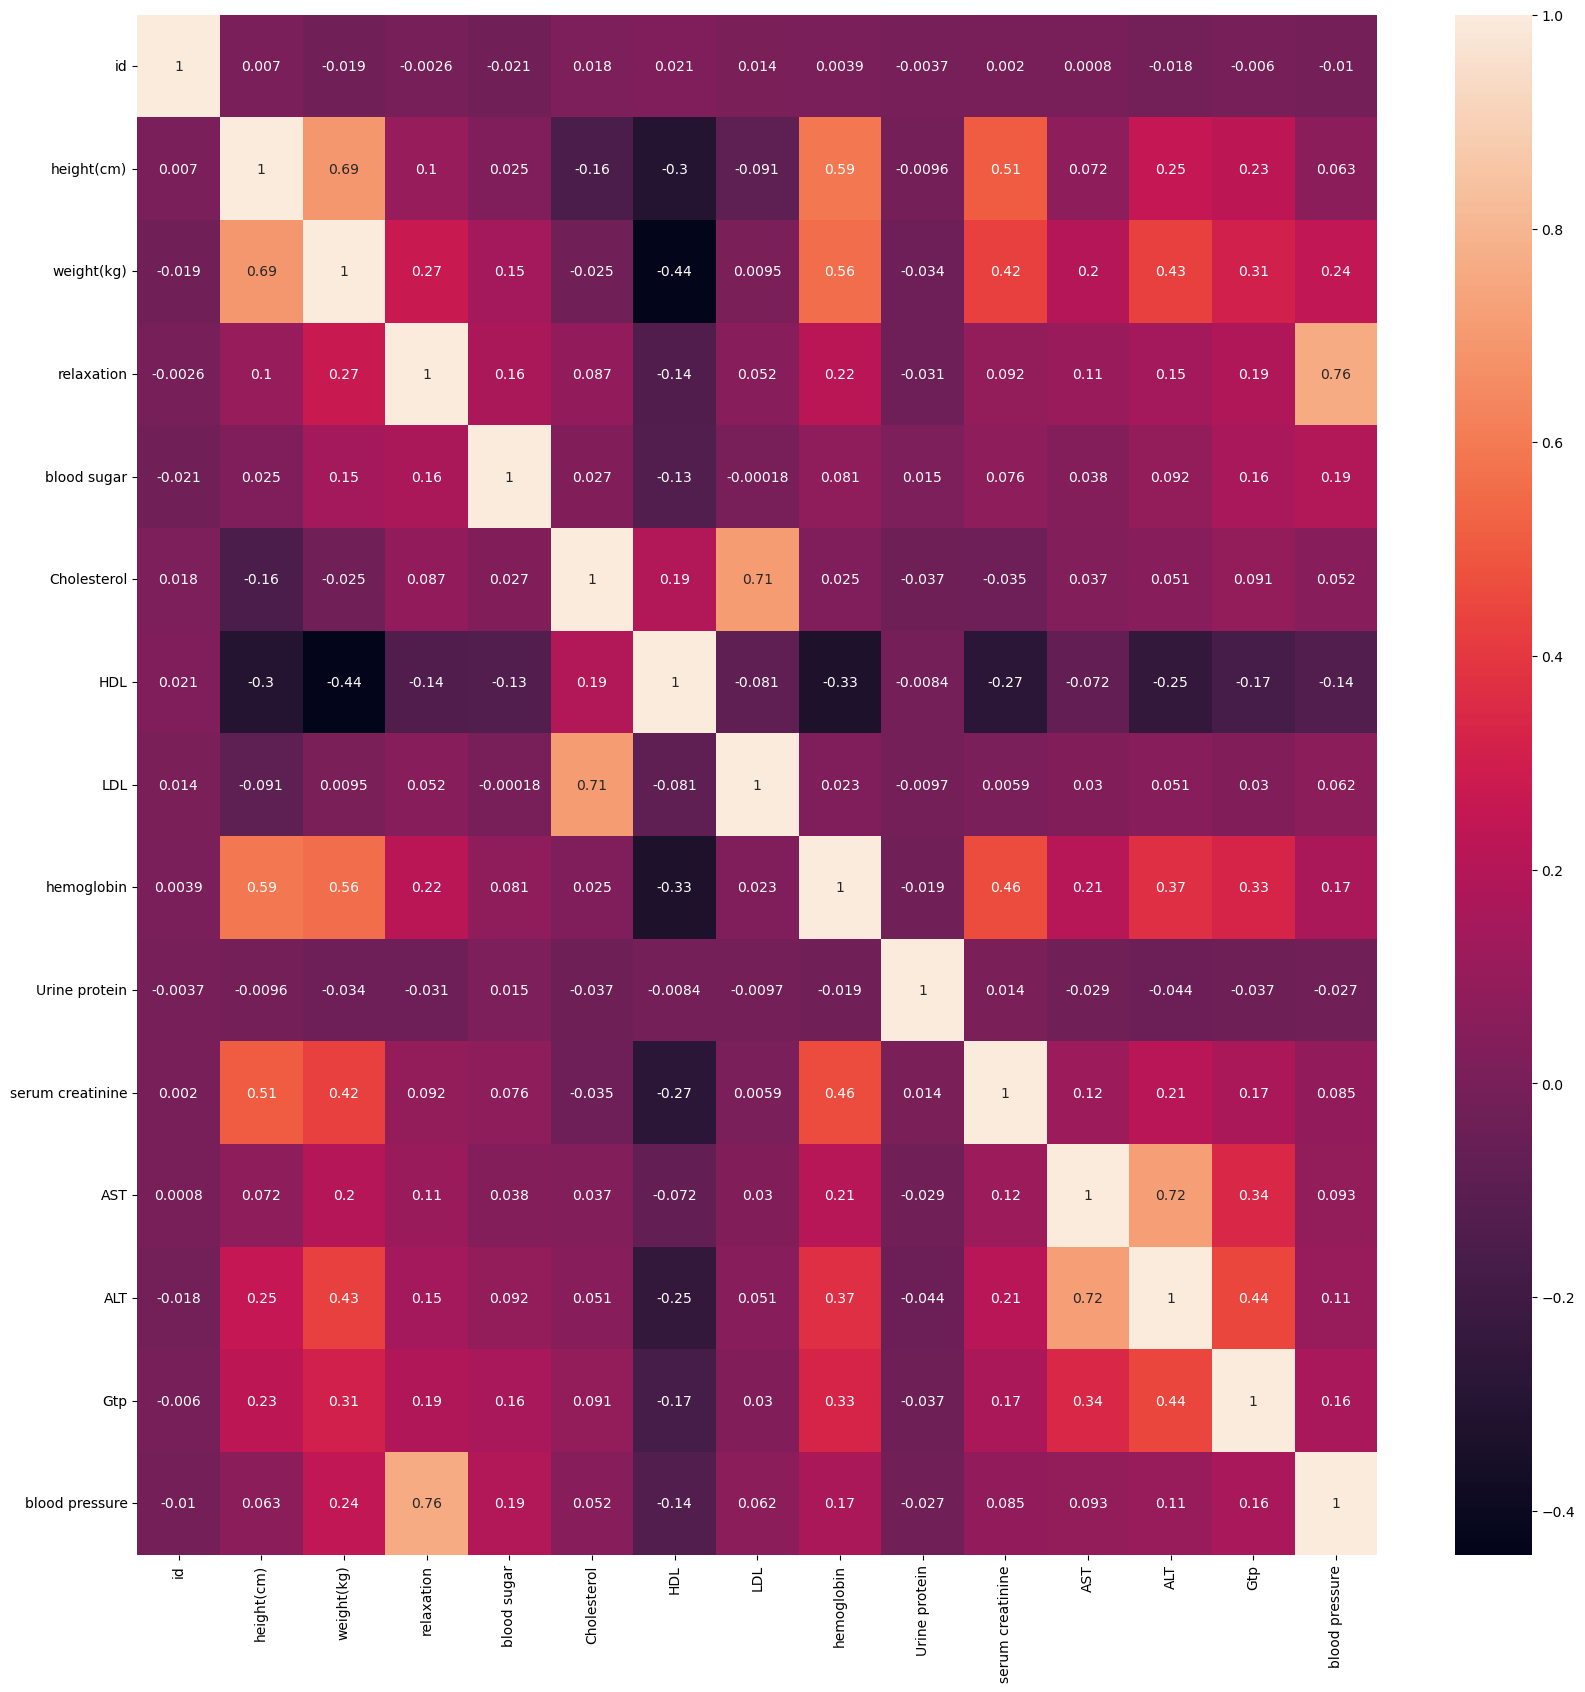

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['age', 'triglyceride', 'dental caries']).corr(), annot=True)
plt.show()

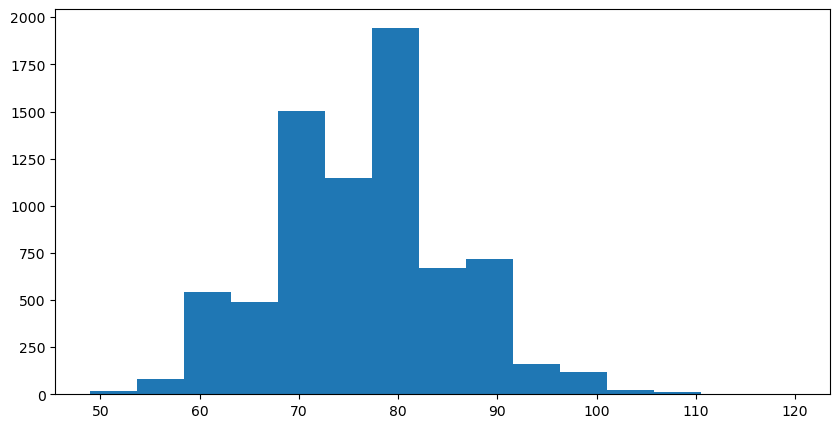

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data['relaxation'], bins=15)
plt.show()

In [8]:
data.sample(3)

id         age  height(cm)  weight(kg)  relaxation  blood sugar  \
2399      NaN   5/26/1949       150.0         NaN        62.0        129.0   
5307  86847.0  11/13/1984         NaN        50.0         NaN          NaN   
118       NaN   4/22/1964       155.0        50.0         NaN        106.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
2399        155.0          LOW   NaN    NaN        13.8            1.0   
5307        186.0          NaN  53.0    NaN        13.7            1.0   
118         232.0          LOW  56.0  164.0        16.1            2.0   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
2399               NaN  24.0  26.0  18.0            No           114.0  
5307               0.8  18.0  17.0  20.0            No           150.0  
118                0.9  26.0  11.0  24.0            No             NaN

In [9]:
data=data.drop(columns='id')

In [10]:
data = data.copy()
for i in range(len(data.age)):
    a=data.age[i]
    year=str(a).split("/")[-1]
    if year.lower() != 'nan':
        data.loc[i,'age']=2024-int(year)

In [11]:
data.sample(3)

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
8999  60       150.0        55.0         NaN         91.0        264.0   
6289  60       155.0        50.0         NaN        111.0        126.0   
8077  35       170.0        80.0        85.0         77.0        235.0   

     triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
8999          NaN  86.0    NaN        13.1            1.0               0.7   
6289          LOW  44.0   66.0        13.3            1.0               1.0   
8077          UNK  49.0  170.0        15.1            NaN               0.7   

       AST   ALT   Gtp dental caries  blood pressure  
8999  23.0  18.0  18.0            No           133.0  
6289  20.0   NaN  13.0            No             NaN  
8077   NaN   NaN  21.0            No           132.0

In [12]:
data.isnull().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [13]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

column  percent missing
0                age            26.88
1         height(cm)            26.27
2         weight(kg)            25.56
3         relaxation            25.75
4        blood sugar            25.62
5        Cholesterol            26.14
6       triglyceride            13.56
7                HDL            26.09
8                LDL            26.42
9         hemoglobin            25.83
10     Urine protein            25.25
11  serum creatinine            25.67
12               AST            25.73
13               ALT            25.84
14               Gtp            25.89
15     dental caries             0.00
16    blood pressure            25.23

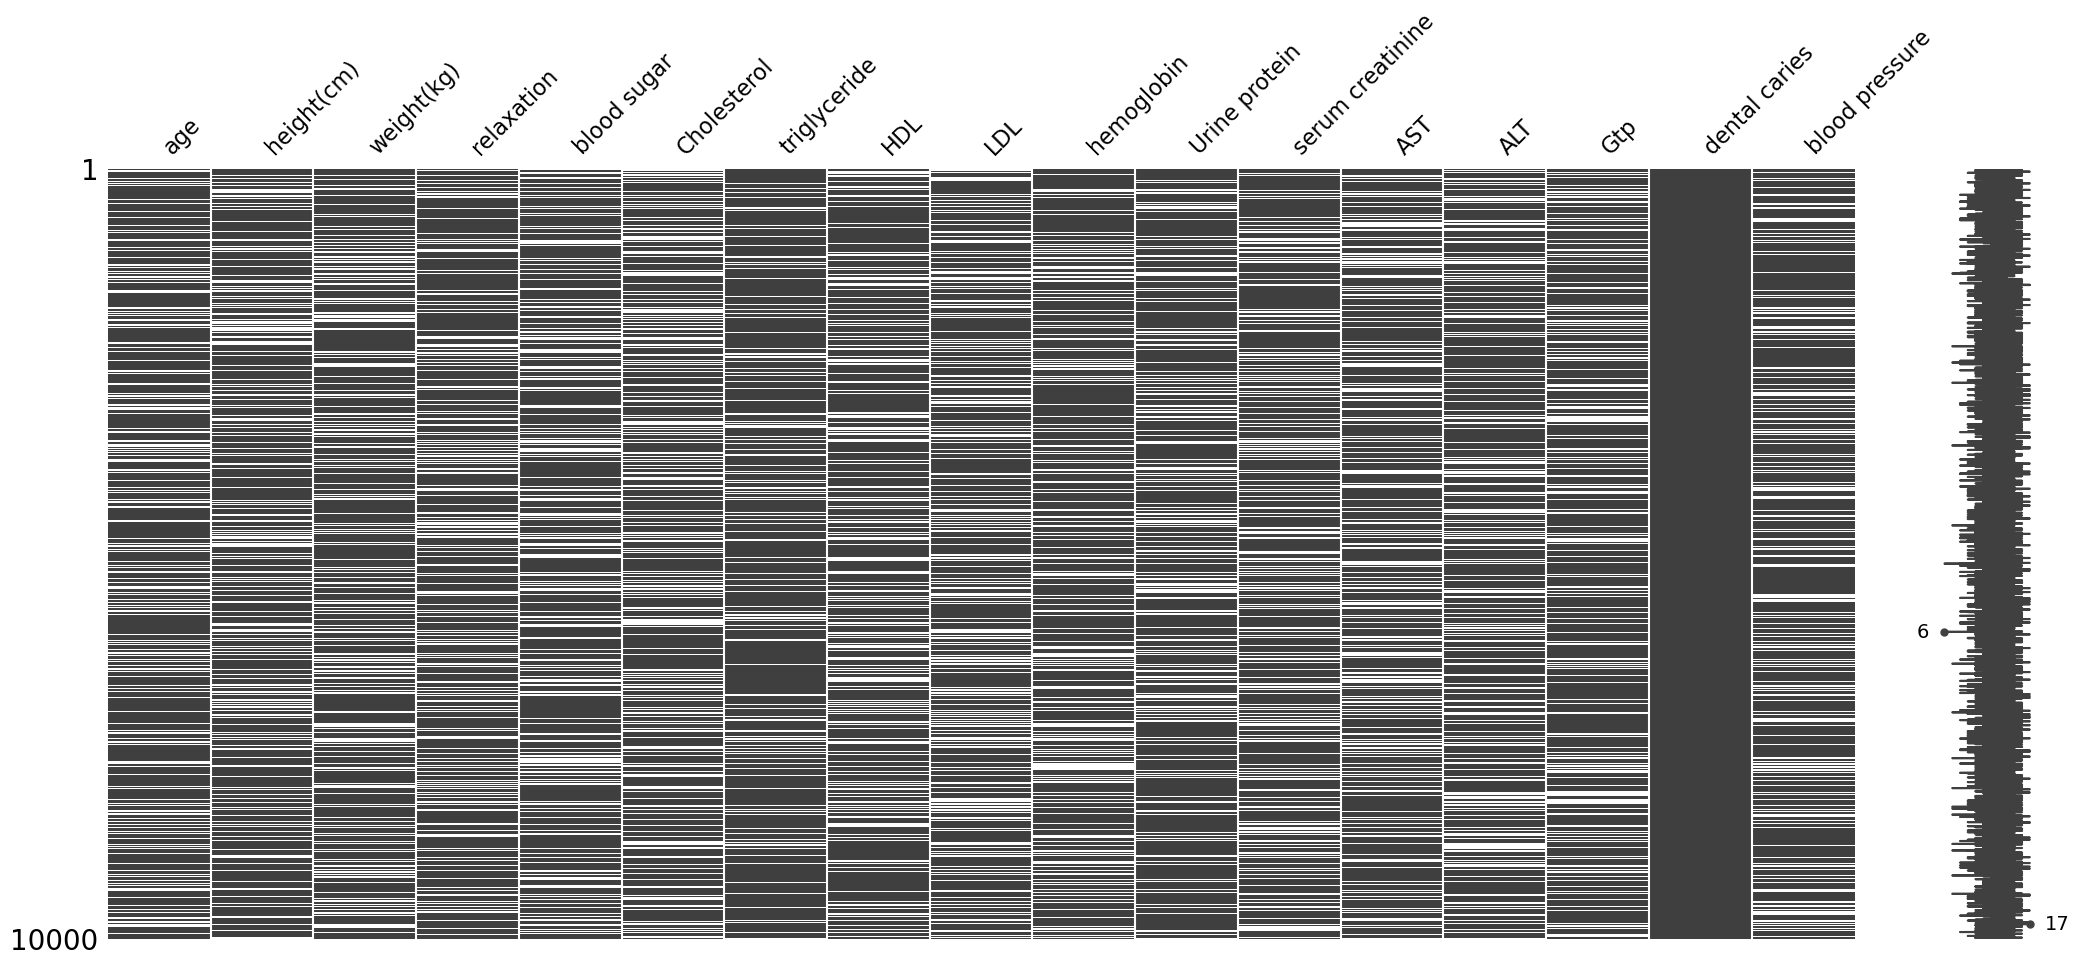

In [14]:
msno.matrix(data)
plt.show()

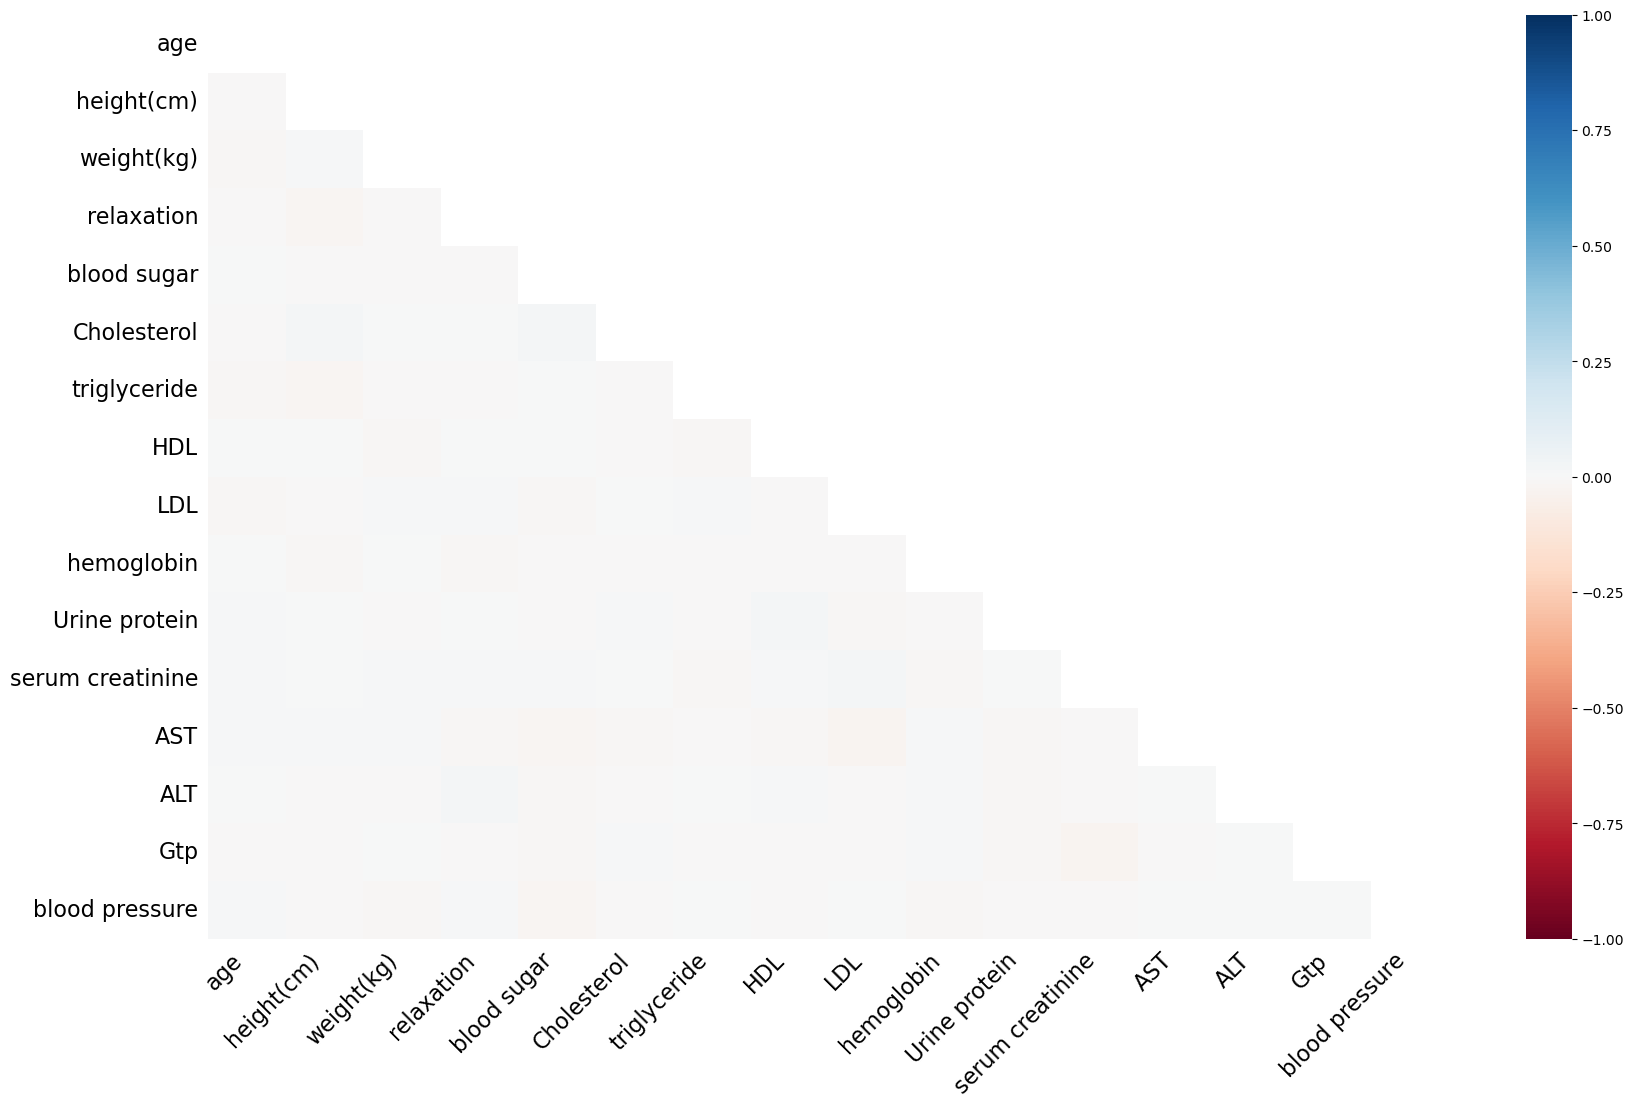

In [15]:
msno.heatmap(data)
plt.show()

# HANDLING MISSING VALUES

In [17]:
data.age = data.age.fillna(data.age.median())

C:\Users\dimit\AppData\Local\Temp\ipykernel_23200\688597995.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.age = data.age.fillna(data.age.median())


In [18]:
data.isnull().sum()

age                    0
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   height(cm)        7373 non-null   float64
 2   weight(kg)        7444 non-null   float64
 3   relaxation        7425 non-null   float64
 4   blood sugar       7438 non-null   float64
 5   Cholesterol       7386 non-null   float64
 6   triglyceride      8644 non-null   object 
 7   HDL               7391 non-null   float64
 8   LDL               7358 non-null   float64
 9   hemoglobin        7417 non-null   float64
 10  Urine protein     7475 non-null   float64
 11  serum creatinine  7433 non-null   float64
 12  AST               7427 non-null   float64
 13  ALT               7416 non-null   float64
 14  Gtp               7411 non-null   float64
 15  dental caries     10000 non-null  object 
 16  blood pressure    7477 non-null   float64

In [20]:
data = data.dropna(subset=['blood pressure'], axis=0)

In [21]:
data.isnull().sum()

age                    0
height(cm)          1967
weight(kg)          1927
relaxation          1910
blood sugar         1947
Cholesterol         1966
triglyceride        1007
HDL                 1962
LDL                 1966
hemoglobin          1961
Urine protein       1901
serum creatinine    1921
AST                 1923
ALT                 1919
Gtp                 1927
dental caries          0
blood pressure         0
dtype: int64

In [22]:
columnsTranform=['height(cm)','weight(kg)','weight(kg)','relaxation','blood sugar','Cholesterol','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columnsTranform])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [23]:
imputed_data = scaler.inverse_transform(imputed_data)
data[columnsTranform] = imputed_data

In [24]:
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride        1007
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure         0
dtype: int64

In [25]:
data.triglyceride=data.triglyceride.fillna('UNK')

In [26]:
data.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [27]:
data.sample(3)

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
2918  45.0       170.0        50.0        90.0        103.0        138.0   
9270  40.0       160.0        54.0        64.0        100.4        157.0   
5464  41.0       165.0        75.0        85.0         96.0        212.0   

     triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
2918          LOW  45.0   83.0       14.68            1.0              0.80   
9270          UNK  55.0   93.0       13.10            1.4              0.90   
5464         HiGH  58.4  136.0       15.38            1.0              0.92   

       AST   ALT   Gtp dental caries  blood pressure  
2918  26.0  21.0  17.0           Yes           138.0  
9270  15.0   7.0  13.8            No           105.0  
5464  15.0  12.0  21.0            No           122.0

# FEATURE PREPROCESSING ENCODING

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [30]:
for column in data.columns:
    if type(data[column].to_list()[0]) == str:
         data[column] = encoder.fit_transform(data[column])

In [31]:
data.sample(3)

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
8617  45.0       170.0        70.0        80.0         94.0        214.0   
3272  60.0       170.0        65.0        80.0        105.0        213.0   
318   30.0       170.0        75.0        71.6         95.0        189.0   

      triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
8617             4  43.0  147.0        15.1            1.0              1.02   
3272             1  62.0  113.8        16.3            1.0              0.98   
318              4  74.0  105.0        16.1            1.0              1.14   

       AST   ALT   Gtp  dental caries  blood pressure  
8617  28.0  65.0  38.0              0           120.0  
3272  26.6  33.0  42.0              0           124.0  
318   23.8  15.0  14.0              0           114.0

In [32]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

# two models: XGBoost and RandomForest --> 5-fold cross-validation

In [34]:
X = data.drop(['blood pressure'],axis=1)
Y = data['blood pressure']

In [35]:
from sklearn.model_selection import train_test_split
#80:20
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [36]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [37]:
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[10,8,15]
}

In [38]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [39]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [78]:
cv.fit(X,Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bylevel': [0.6, 0.7, 0.8],
                         'learning_rate': [0.1, 0.9, 0.5],
                         'max_depth': [10, 8, 15]})

In [80]:
cv.best_score_

0.4294133739289167

In [82]:
model = cv.best_estimator_

In [84]:
y_pred = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.8155659375863328